In [1]:
from datasets import load_dataset
from tqdm import tqdm
import pandas as pd
import glob
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandarallel import pandarallel
import spacy

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [2]:
df_v = pd.read_parquet("acl_corpus_full-text.parquet")

In [3]:
df_v

,acl_id,title,abstract,full_text
0,O02-2002,A Study on Word Similarity using Context Vecto...,There is a need to measure word similarity whe...,There is a need to measure word similarity whe...
1,L02-1310,,,
2,R13-1042,"Headerless, Quoteless, but not Hopeless? Using...",Thread disentanglement is the task of separati...,Thread disentanglement is the task of separati...
3,W05-0819,Aligning words in English-Hindi parallel corpora,"In this paper, we describe a word alignment al...","In this paper, we describe a word alignment al..."
4,L02-1309,,,
...,...,...,...,...
80008,P99-1056,The grapho-phonological system of written Fren...,The processes through which readers evoke ment...,The processes through which readers evoke ment...
80009,P99-1051,Acquiring Lexical Generalizations from Corpora...,This paper examines the extent to which verb d...,This paper examines the extent to which verb d...
80010,P99-1000,Using Aggregation for Selecting Content when G...,"As co-chairs, we had two particular objectives...","As co-chairs, we had two particular objectives..."
80011,P99-1,,,


In [4]:
64422/80013

0.8051441640733381

In [3]:
df_v

# change empty string to None 
df_v = df_v.replace(r'^\s*$', np.nan, regex=True)
# df_v = df_v.dropna()

In [4]:
from langdetect import detect
detect("动 动 动词 词 词句 句 句法 法 法")

'ko'

In [5]:
import spacy_fastlang

nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("language_detector")
doc = nlp('Life is like a box of chocolates. You never know what you are gonna get.')

assert doc._.language == 'en'
assert doc._.language_score >= 0.8

In [6]:
doc = nlp('动 动 动词 词 词句 句 句法 法 法')
doc._.language

'zh'

In [7]:
def return_language(text):
    if text:
        try:
            return nlp(text)._.language
        except:
            return None
    else:
        return

tqdm.pandas()
df_v["language_detected"] = df_v["title"].parallel_apply(return_language)

In [8]:
df_v["language_detected"].value_counts().sort_values()


sco        1
bh         1
tt         1
br         1
fy         1
       ...  
es       217
zh       250
ja       271
fr      2216
en     64422
Name: language_detected, Length: 96, dtype: int64

In [9]:
dict_langs = {
  "af": "Afrikaans",
  "sq": "Albanian",
  "ar": "Arabic",
  "bn": "Bengali",
  "bs": "Bosnian",
  "bg": "Bulgarian",
  "ca": "Catalan",
  "hr": "Croatian",
  "cs": "Czech",
  "da": "Danish",
  "nl": "Dutch",
  "en": "English",
  "et": "Estonian",
  "tl": "Filipino",
  "fi": "Finnish",
  "fr": "French",
  "de": "German",
  "el": "Greek",
  "gu": "Gujarati",
  "hi": "Hindi",
  "hu": "Hungarian",
  "is": "Icelandic",
  "id": "Indonesian",
  "ga": "Irish",
  "it": "Italian",
  "ja": "Japanese",
  "jv": "Javanese",
  "kn": "Kannada",
  "kk": "Kazakh",
  "km": "Khmer",
  "ko": "Korean",
  "lo": "Lao",
  "la": "Latin",
  "lv": "Latvian",
  "lt": "Lithuanian",
  "mk": "Macedonian",
  "mg": "Malagasy",
  "ms": "Malay",
  "ml": "Malayalam",
  "mt": "Maltese",
  "mi": "Maori",
  "mr": "Marathi",
  "mn": "Mongolian",
  "my": "Burmese",
  "ne": "Nepali",
  "no": "Norwegian",
  "or": "Oriya",
  "ps": "Pashto",
  "fa": "Persian",
  "pl": "Polish",
  "pt": "Portuguese",
  "pa": "Punjabi",
  "ro": "Romanian",
  "ru": "Russian",
  "sr": "Serbian",
  "sk": "Slovak",
  "sl": "Slovenian",
  "so": "Somali",
  "es": "Spanish",
  "su": "Sundanese",
  "sw": "Swahili",
  "sv": "Swedish",
  "ta": "Tamil",
  "te": "Telugu",
  "th": "Thai",
  "tr": "Turkish",
  "uk": "Ukrainian",
  "ur": "Urdu",
  "uz": "Uzbek",
  "vi": "Vietnamese",
  "cy": "Welsh",
  "xh": "Xhosa",
  "yi": "Yiddish",
  "yo": "Yoruba",
  "zu": "Zulu",
  "zh": "Chinese",
}


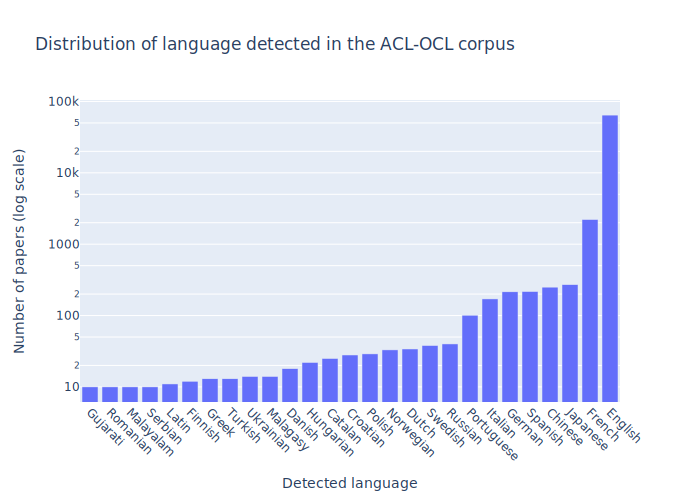

In [11]:
import plotly.graph_objects as go

value_counts = df_v["language_detected"].value_counts().sort_values()

value_counts = value_counts[value_counts >= 10]


#value counts everything other than english
# value_counts = value_counts[value_counts.index != "en"]

fig = go.Figure()
fig.add_trace(
    go.Bar(
        x=[dict_langs.get(key) for key in value_counts.index],
        y=value_counts.values,
        # labels={'x':'Detected language'}
    )
)
# change y-axis to log scale
fig.update_yaxes(type="log")

# rotate the x-axis labels
fig.update_layout(xaxis=dict(tickangle=45))
fig.update_layout(
        title = "Distribution of language detected in the ACL-OCL corpus",
    font=dict(
        # size=10,  # Set the font size here
    ),

xaxis_title="Detected language",
yaxis_title="Number of papers (log scale)",

)
fig.show(renderer="svg")